#### Simple Linear Regression Exercise
This uses Kaggle Dataset for practise purposes.
'https://www.kaggle.com/datasets/andonians/random-linear-regression'


## Importing Libraries

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Data

In [3]:
#read the given data sets
test=pd.read_csv("test_kaggle.csv")
train=pd.read_csv("train_kaggle.csv")

## Checking Data

In [4]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [5]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [7]:
test.shape

(300, 2)

In [8]:
train.shape

(700, 2)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [11]:
test.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [12]:
train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [14]:
#there is a missing value in train data set
#purging the value
train=train.dropna()
train.shape

(699, 2)

In [15]:
train.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


## Visualising Data

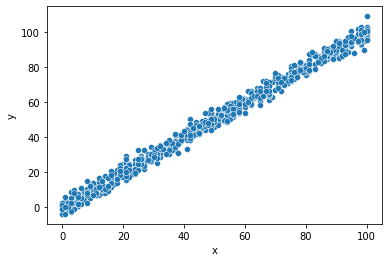

In [17]:
#check training data
sns.scatterplot(data=train,x='x',y='y')
plt.show()

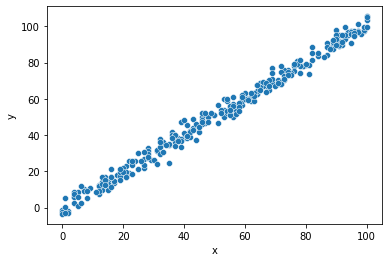

In [18]:
#check testing data
sns.scatterplot(data=test,x='x',y='y')
plt.show()

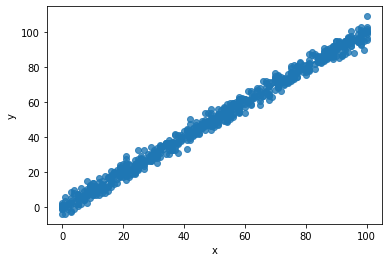

In [24]:
#plot regression plot for testing and training data
sns.regplot(data=train, x='x', y='y')
plt.show()

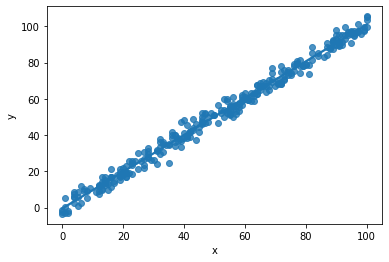

In [25]:
sns.regplot(data=test, x='x', y='y')
plt.show()

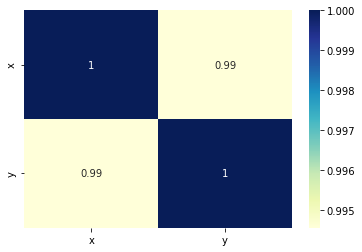

In [26]:
#check heat map for test data
sns.heatmap(test.corr(), cmap="YlGnBu", annot = True)
plt.show()

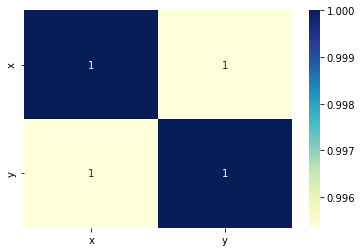

In [27]:
#check heat map for train data
sns.heatmap(train.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Building model

In [28]:
import statsmodels.api as sm

In [29]:
X_test=test.x
y_test=test.y
X_train=train.x
y_train=train.y

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels

In [30]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [31]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [32]:
X_train_sm.head()

,const,x
0,1.0,24.0
1,1.0,50.0
2,1.0,15.0
3,1.0,38.0
4,1.0,87.0


In [34]:
#print regression parameters
lr.params

const   -0.107265
x        1.000656
dtype: float64

In [36]:
#print summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.426e+04
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:14:27   Log-Likelihood:                -1712.8
No. Observations:                 699   AIC:                             3430.
Df Residuals:                     697   BIC:                             3439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1073      0.212     -0.506      0.613      -0.524       0.309
x              1.0007      0.004    272.510      0.000       0.993       1.008
==============================================================================
Omnibus:                        0.170   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.216
Skew:                           0.036   Prob(JB):                        0.898
Kurtosis:                       2.952   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
lr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.991    
Dependent Variable: y                AIC:                3429.5540
Date:               2022-03-20 23:14 BIC:                3438.6533
No. Observations:   699              Log-Likelihood:     -1712.8  
Df Model:           1                F-statistic:        7.426e+04
Df Residuals:       697              Prob (F-statistic): 0.00     
R-squared:          0.991            Scale:              7.8903   
--------------------------------------------------------------------
            Coef.    Std.Err.      t       P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const      -0.1073     0.2122    -0.5056   0.6133   -0.5238   0.3093
x           1.0007     0.0037   272.5098   0.0000    0.9934   1.0079
------------------------------------------------------------------
Omnibus:               0.170        Durbin-Watson:           1.966
Prob(Omnibus):         0.919        Jarque-Bera (JB):        0.216
Skew:                  0.036        Prob(JB):                0.898
Kurtosis:              2.952        Condition No.:           115  
==================================================================

"""

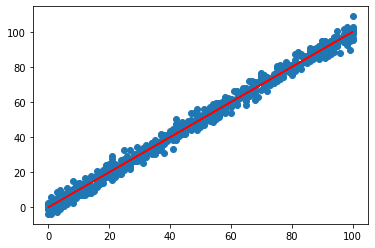

In [39]:
#plotting the regression line from the derived variables on training data
plt.scatter(X_train, y_train)
plt.plot(X_train, -0.1073 + 1.0007*X_train, 'r')
plt.show()

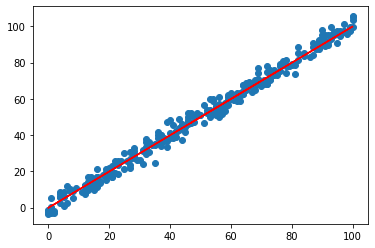

In [40]:
plt.scatter(X_test, y_test)
plt.plot(X_test, -0.1073 + 1.0007*X_test, 'r')
plt.show()

## Residual Analysis

C:\Users\droid\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


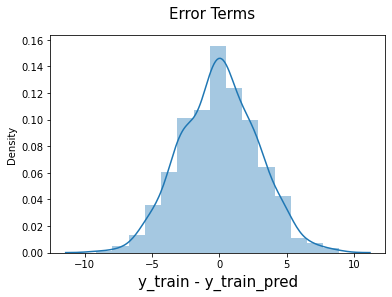

In [43]:
##check distribution of error terms for training data
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
#plot the distrbution
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

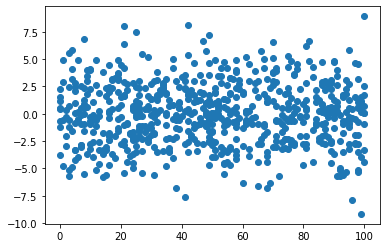

In [45]:
##check pattern for residuals
plt.scatter(X_train,res)
plt.show()

## Prediction on test data

In [46]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [49]:
#import libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Calculate RMSE

In [50]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

3.071306268029831

### Calculate R squared

In [51]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9888014444327563

In [52]:
y_pred.shape

(300,)

C:\Users\droid\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


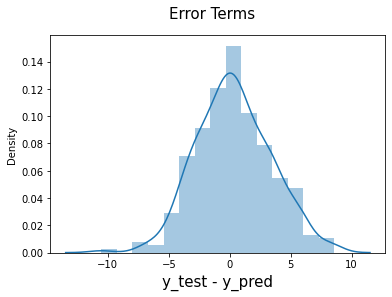

In [54]:
#check error distribution of actual y and y_pred
res = (y_test - y_pred)
#plot the distrbution
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)           # Plot heading 
plt.xlabel('y_test - y_pred', fontsize = 15)         # X-label
plt.show()

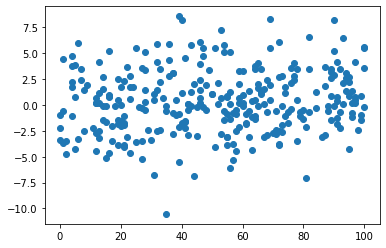

In [55]:
##check pattern for residuals
plt.scatter(X_test,res)
plt.show()